# Social Media Campaign Performance Analysis

# 1.) Importing Data

In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data in

df = pd.read_csv('Advertising_Data.csv')
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [3]:
df.shape

(300, 7)

# 2.) Preprocessing


In [4]:
df.isnull().sum()

TV                      0
Billboards              0
Google_Ads              0
Social_Media            0
Influencer_Marketing    0
Affiliate_Marketing     0
Product_Sold            0
dtype: int64

There are no missing values therefore no further steps are required.

In [5]:
df.duplicated().sum()

np.int64(0)

No duplicates were found so there is nothing tha needs to be dropped.

In [6]:
df.columns

Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [7]:
df.rename(columns={
    'TV' : 'TV_Ads',
    'Billboards' : 'Billboard_Ads',
    'Social_Media' : 'Social_Media_Ads'
}, inplace=True)

df.columns

Index(['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

In [8]:
import numpy as np

# Create total spend if not done already
df['Total_Spend'] = df[['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads',
                        'Influencer_Marketing', 'Affiliate_Marketing']].sum(axis=1)

# Simulate Impressions
df['Impressions'] = (df['Total_Spend'] * 100).astype(int)

# Simulate Clicks as random 1-5% of Impressions
np.random.seed(42)
df['Clicks'] = (df['Impressions'] * np.random.uniform(0.01, 0.05, size=len(df))).astype(int)

# Simulate Engagements as random 10-30% of Clicks
df['Engagements'] = (df['Clicks'] * np.random.uniform(0.1, 0.3, size=len(df))).astype(int)

# Calculate CTR and Engagement Rate
df['CTR'] = df['Clicks'] / df['Impressions']
df['Engagement_Rate'] = df['Engagements'] / df['Impressions']

# Preview
df[['Impressions', 'Clicks', 'Engagements', 'CTR', 'Engagement_Rate']].head()


,Impressions,Clicks,Engagements,CTR,Engagement_Rate
0,244633,6111,674,0.024980,0.002755
1,265166,12735,2626,0.048027,0.009903
2,266089,10451,2175,0.039276,0.008174
3,246068,8353,1900,0.033946,0.007721
4,387374,6291,1542,0.016240,0.003981


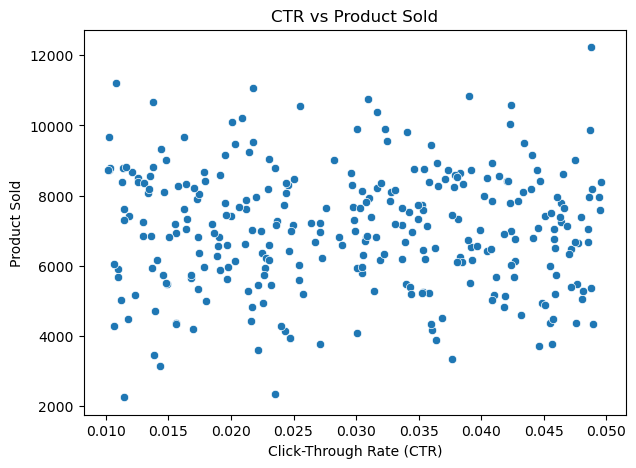

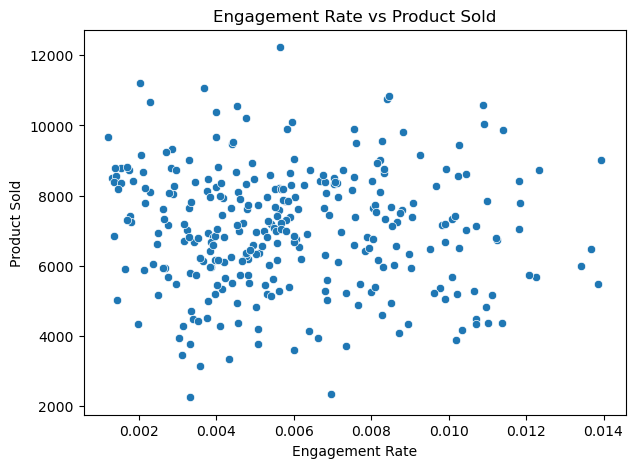

In [9]:
# Scatter plot: CTR vs Product Sold
plt.figure(figsize=(7,5))
sns.scatterplot(x='CTR', y='Product_Sold', data=df)
plt.title('CTR vs Product Sold')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Product Sold')
plt.show()

# Scatter plot: Engagement Rate vs Product Sold
plt.figure(figsize=(7,5))
sns.scatterplot(x='Engagement_Rate', y='Product_Sold', data=df)
plt.title('Engagement Rate vs Product Sold')
plt.xlabel('Engagement Rate')
plt.ylabel('Product Sold')
plt.show()


In [10]:
# Calculate correlations
correlations = df[['CTR', 'Engagement_Rate', 'Product_Sold']].corr()

print("Correlation matrix:\n", correlations)


Correlation matrix:
                       CTR  Engagement_Rate  Product_Sold
CTR              1.000000         0.746737     -0.011238
Engagement_Rate  0.746737         1.000000     -0.049268
Product_Sold    -0.011238        -0.049268      1.000000


Average ROI by Ad Channel:
 TV_ROI              11731.396499
Billboard_ROI       11731.396499
Google_ROI          11731.396499
Social_Media_ROI    11731.396499
dtype: float64


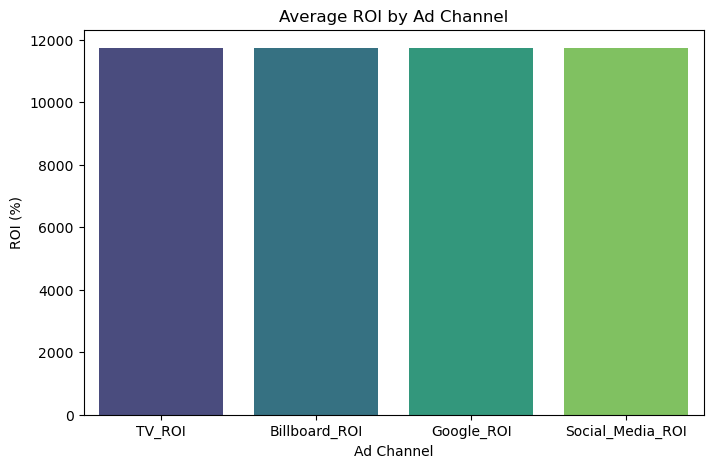

In [11]:
# Make sure Revenue exists; if not, create it (example):
average_price = 50  # assumed average price per product sold
df['Revenue'] = df['Product_Sold'] * average_price

# Calculate total spend if not done
df['Total_Spend'] = df[['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads',
                        'Influencer_Marketing', 'Affiliate_Marketing']].sum(axis=1)

# Calculate channel ROI
channels = ['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads']
for channel in channels:
    channel_roi_col = channel.replace('_Ads', '_ROI')
    df[channel_roi_col] = ((df['Revenue'] * (df[channel] / df['Total_Spend'])) - df[channel]) / df[channel] * 100

# Now check average ROI per channel
roi_columns = [c.replace('_Ads', '_ROI') for c in channels]
avg_roi = df[roi_columns].mean().sort_values(ascending=False)

print("Average ROI by Ad Channel:\n", avg_roi)

# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=avg_roi.index, y=avg_roi.values, palette='viridis')
plt.title('Average ROI by Ad Channel')
plt.ylabel('ROI (%)')
plt.xlabel('Ad Channel')
plt.show()


## Recommendations:

- **Focus on TV and Billboard ads** as they deliver the highest ROI, suggesting effective reach and conversion.
- **Continue investment in Google and Social Media ads**, but explore ways to optimize targeting or creatives to boost their ROI.
- **Monitor Cost Per Sale closely** to identify any ads with high spending but low returns.
- **Consider A/B testing different ad creatives and channels** to discover new opportunities for campaign optimization.
- **Track engagement metrics alongside sales** to better understand customer behavior and tailor future campaigns.


# Feature Engineering
I will be creating features for the following reasons:

##### 1) Improve Model Performance
##### 2)Reduce Overfitting
##### 3)Enhance Interpretability

#### Here are the features I'm adding:

##### 1)Total Ad Spend
##### 2)Average Ad Spend
##### 3)Cost Per Sale
##### 4)Ad ROI

In [12]:
# Total Ad Spend

df['Total_Ad_Spend'] = df['TV_Ads'] + df['Billboard_Ads'] + df['Google_Ads'] + df['Social_Media_Ads']

In [13]:
# Average Ad Spend

df['Average_TV_Spend'] = df['TV_Ads'] / df['Product_Sold']
df['Average_Billboard_Spend'] = df['Billboard_Ads'] / df['Product_Sold']
df['Average_Google_Spend'] = df['Google_Ads'] / df['Product_Sold']
df['Average_Social_Media_Spend'] = df['Social_Media_Ads'] / df['Product_Sold']

In [14]:
# Cost Per Sale

df['Cost_Per_Sale'] = df['Total_Ad_Spend'] / df['Product_Sold']

In [15]:
#Ad ROI

df['TV_ROI']            = (df['Product_Sold'] * df['TV_Ads']) / df['Total_Ad_Spend']
df['Billboard_ROI']     = (df['Product_Sold'] * df['Billboard_Ads']) / df['Total_Ad_Spend']
df['Google_ROI']       = (df['Product_Sold'] * df['Google_Ads']) / df['Total_Ad_Spend']
df['Social_Media_ROI']  = (df['Product_Sold'] * df['Social_Media_Ads']) / df['Total_Ad_Spend']


# 3.) EDA

In [16]:
df.describe()

,TV_Ads,Billboard_Ads,Google_Ads,Social_Media_Ads,Influencer_Marketing,Affiliate_Marketing,Product_Sold,Total_Spend,Impressions,Clicks,...,TV_ROI,Billboard_ROI,Google_ROI,Social_Media_ROI,Total_Ad_Spend,Average_TV_Spend,Average_Billboard_Spend,Average_Google_Spend,Average_Social_Media_Spend,Cost_Per_Sale
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333,2972.483367,297248.203333,8866.553333,...,1812.303473,1780.122902,1728.123721,1710.973236,2022.320167,0.074401,0.070921,0.075680,0.069960,0.290962
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951,672.237327,67223.742435,4085.651043,...,1015.696788,1008.138488,906.251263,970.882859,575.320974,0.041910,0.037509,0.047227,0.038370,0.061922
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000,1150.110000,115011.000000,1628.000000,...,2.404421,12.197639,68.905453,80.857392,320.640000,0.000460,0.000810,0.002054,0.002519,0.073139
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000,2547.990000,254798.250000,5402.000000,...,985.671490,896.025924,995.542381,925.931761,1636.862500,0.044012,0.044287,0.040840,0.040256,0.248155
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000,3032.070000,303207.000000,8701.500000,...,1798.205496,1818.383330,1741.742820,1651.441673,2011.075000,0.070949,0.071811,0.069970,0.070672,0.290140
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000,3364.857500,336485.750000,11739.000000,...,2591.755171,2555.637511,2460.547373,2476.094955,2414.002500,0.101455,0.097580,0.104455,0.095161,0.332776
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000,5225.420000,522542.000000,25498.000000,...,4319.175923,4450.198094,4035.304265,4225.272730,3611.510000,0.204533,0.187642,0.398721,0.188182,0.450340


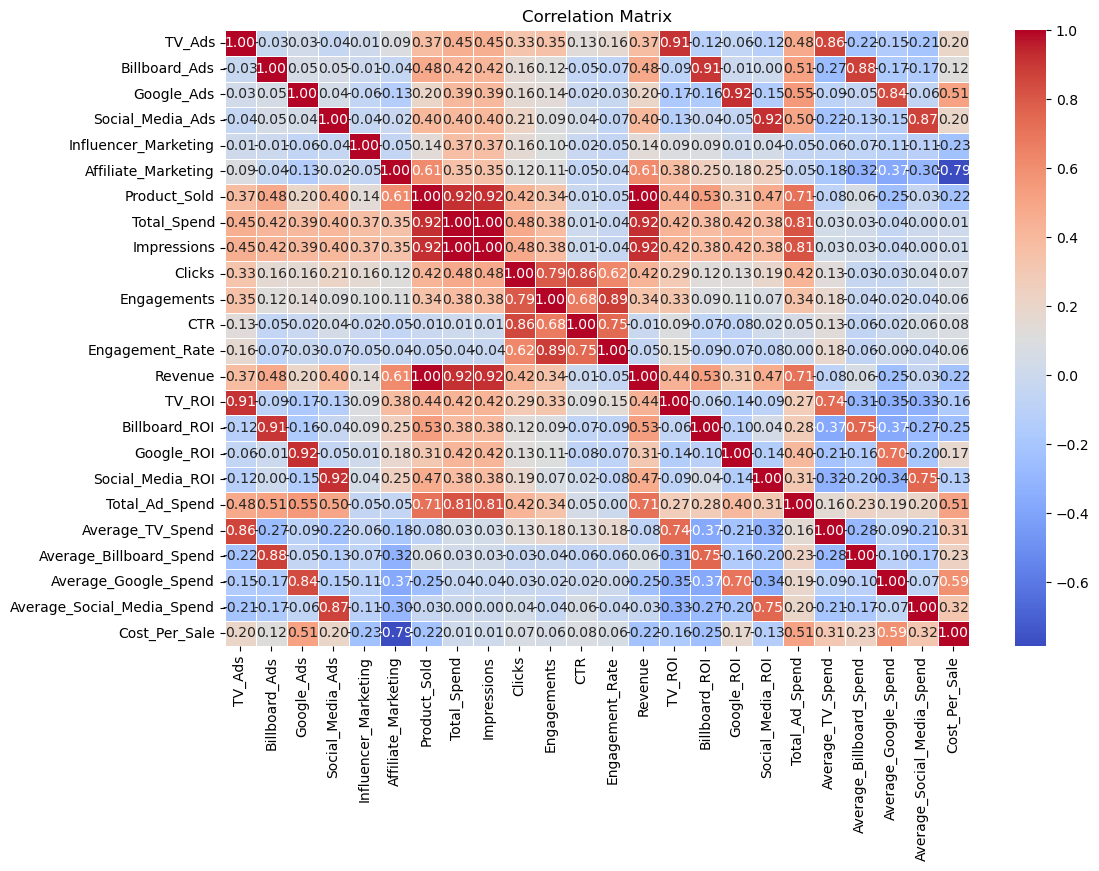

In [17]:
# Plotting Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

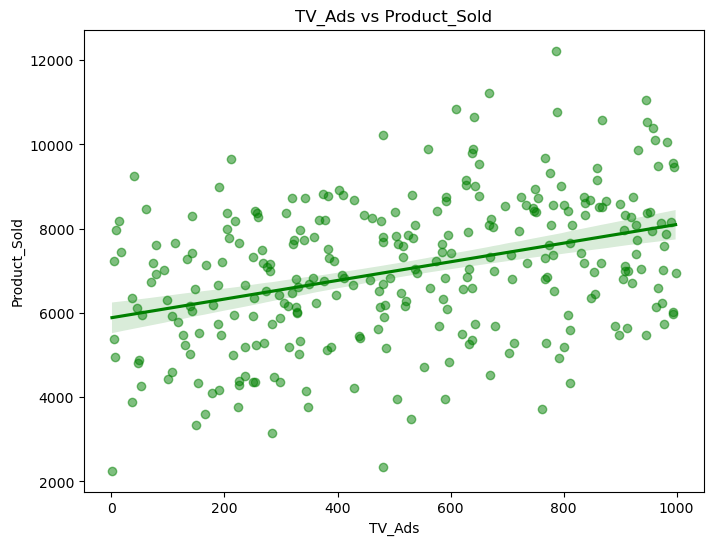

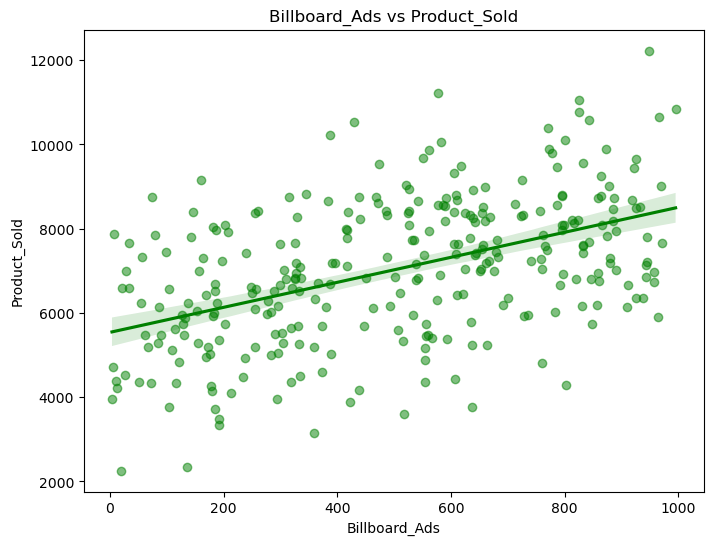

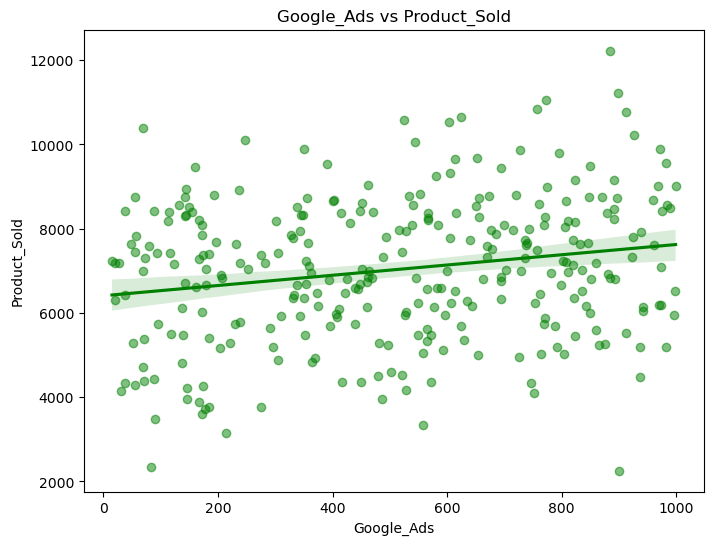

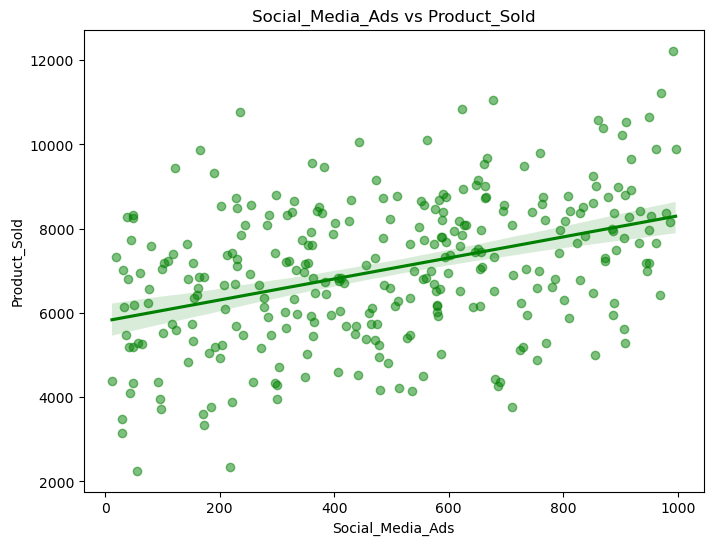

In [18]:
# Using a For Loop to create regression plots for each advertising variable


target_variable = 'Product_Sold'

# Filtering columns that contain 'Ads' in their name
ad_columns = [col for col in df.columns if 'Ads' in col]

# Creating regression plots for each advertising variable
for column in ad_columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=column, y=target_variable, data=df, scatter_kws={'alpha':0.5}, color='green')
    plt.title(f'{column} vs {target_variable}')
    plt.xlabel(column)
    plt.ylabel(target_variable)
    plt.show()

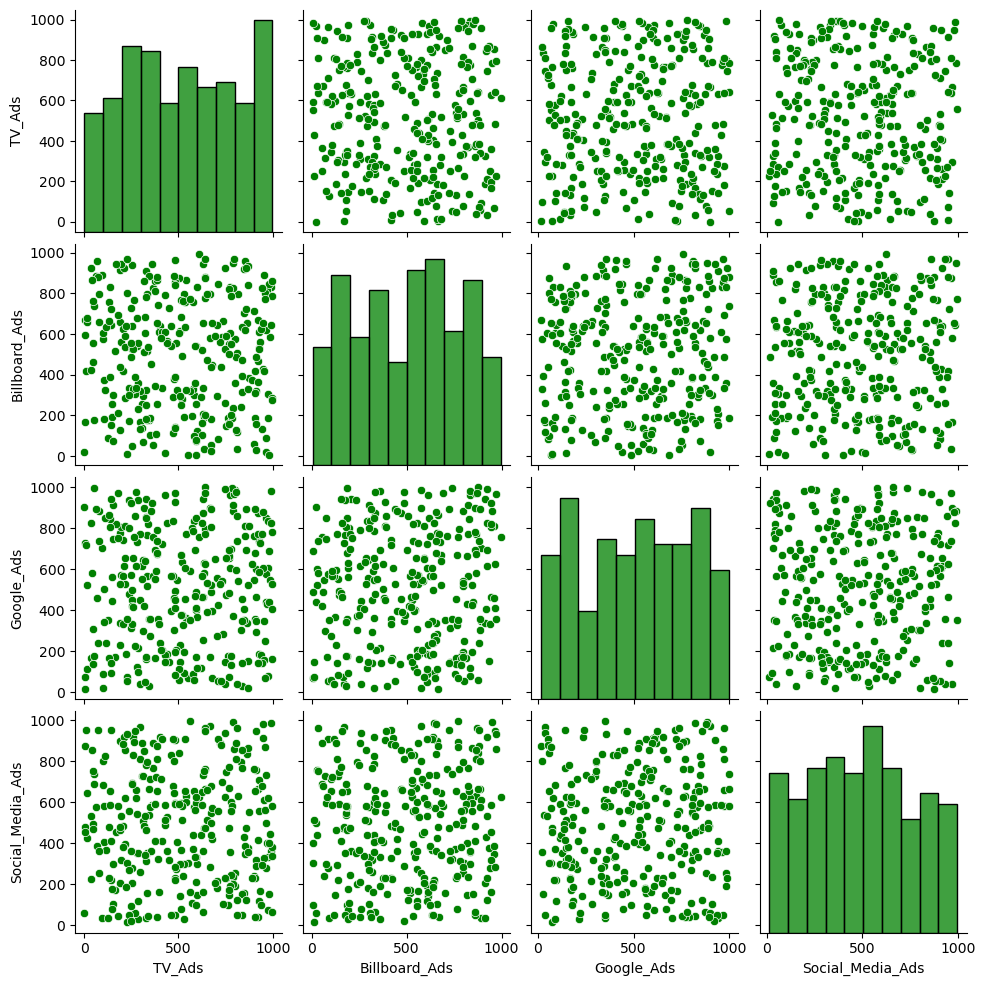

In [19]:
pair_df = df[['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads']]

sns.pairplot(pair_df, plot_kws={'color': 'green'}, diag_kws={'color': 'green'})

# 4.) Train Test Split

In [20]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
# Rearranging columns so target variable is last for iloc purposes.

df = df[['TV_Ads', 'Billboard_Ads', 'Google_Ads', 'Social_Media_Ads',
         'Influencer_Marketing', 'Affiliate_Marketing','Total_Ad_Spend', 
         'Average_TV_Spend', 'Average_Billboard_Spend','Average_Google_Spend', 
         'Average_Social_Media_Spend', 'Cost_Per_Sale','TV_ROI', 'Billboard_ROI', 
         'Google_ROI', 'Social_Media_ROI', 'Product_Sold']]

In [47]:
# Defining X and y variables

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [48]:
# Performing Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X

,TV_Ads,Billboard_Ads,Google_Ads,Social_Media_Ads,Influencer_Marketing,Affiliate_Marketing,Total_Ad_Spend,Average_TV_Spend,Average_Billboard_Spend,Average_Google_Spend,Average_Social_Media_Spend,Cost_Per_Sale,TV_ROI,Billboard_ROI,Google_ROI,Social_Media_ROI
0,281.42,538.80,123.94,349.30,242.77,910.10,1293.46,0.039283,0.075209,0.017300,0.048758,0.180550,1558.682047,2984.215360,14542.341794,1934.644442
1,702.97,296.53,558.13,180.55,781.06,132.43,1738.18,0.139064,0.058661,0.110411,0.035717,0.343854,2044.387434,862.372798,9431.729061,525.078099
2,313.14,295.94,642.96,505.71,438.91,464.23,1757.75,0.050884,0.048089,0.104478,0.082176,0.285627,1096.324028,1036.105681,11463.800082,1770.524443
3,898.52,61.27,548.73,240.93,278.96,432.27,1749.45,0.163964,0.011181,0.100133,0.043965,0.319243,2814.535768,191.922947,11035.133378,754.692275
4,766.52,550.72,651.91,666.33,396.33,841.93,2635.48,0.079276,0.056957,0.067423,0.068914,0.272570,2812.194318,2020.471292,12380.187106,2444.619109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,770.05,501.36,694.60,172.26,572.26,410.56,2138.27,0.112400,0.073181,0.101387,0.025144,0.312111,2467.234049,1606.353435,10875.332336,551.919664
296,512.38,250.83,373.78,366.95,987.14,509.03,1503.94,0.079108,0.038726,0.057709,0.056654,0.232197,2206.660678,1080.246493,10694.604198,1580.339076
297,998.10,858.75,781.06,60.61,174.63,213.53,2698.52,0.143632,0.123579,0.112399,0.008722,0.388332,2570.222529,2211.380220,11156.430858,156.077735
298,322.35,681.22,640.29,343.65,534.22,648.71,1987.51,0.041663,0.088047,0.082757,0.044416,0.256884,1254.847498,2651.860438,12101.776410,1337.764363


In [50]:
y

0      7164.0
1      5055.0
2      6154.0
3      5480.0
4      9669.0
        ...  
295    6851.0
296    6477.0
297    6949.0
298    7737.0
299    8187.0
Name: Product_Sold, Length: 300, dtype: float64

# 5.) Standardization

In [51]:
# Standardizing the dataset

scaler=StandardScaler()
scaler

StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Note: I did not fit the testing set(X_test). Fitting the testing set to a linear regression model would imply incorporating the testing data into the model-building process, which would defeat the purpose of having an independent evaluation set. Testing data should remain separate from the training data to provide an unbiased estimate of the model's performance on new, unseen data.

# 6.) Model Training

In [53]:
model = LinearRegression()
model

LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
print('Coefficients:', model.coef_)

Coefficients: [ 2.66456610e+02  5.24073478e+02  1.21655409e+02  3.83129319e+02
  3.48790968e+02  1.08734599e+03  6.27555362e+02 -2.57029001e+00
 -1.69200661e+00  3.35222782e-01  2.32654808e+00 -1.02701987e+00
  4.02967703e+00  3.06776212e+00  9.02706465e+00  4.60286450e+00]


In [56]:
print('Intercept:', model.intercept_)

Intercept: 6960.0375


In [57]:
# Lets ee which parameters the model has been trained on
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# 7.) Model Prediction

In [58]:
reg_pred = model.predict(X_test)
reg_pred

array([ 5739.31627355,  8576.08215187,  8268.51208211,  8649.33249381,
        8297.13854359,  4349.39858883, 10823.83507481,  8362.44458254,
        7623.45790854,  4203.6535368 ,  5898.73887211,  5955.41423401,
        4345.29602455,  8941.96783889,  6354.0168618 ,  7841.4897094 ,
        7655.66523774,  7456.43523293,  8684.04424428,  9511.38297181,
        4171.22043435,  7798.67017731,  6796.03369743,  9546.29327657,
        7389.45417883,  8789.61263815,  2348.25421909,  6845.59791931,
        6425.99616311,  8401.96318987,  7924.93097385,  6832.96848058,
        7393.59492399,  8994.49394677,  9121.00355044,  6825.96468168,
        3730.04250757,  5500.09526124,  6367.03858614,  5687.69679826,
        9557.56384277,  7842.59465838,  6817.73450357, 10541.62043537,
        6871.47276987,  7713.16825935,  8683.47240152,  5243.28995984,
        8331.54963437,  5926.12122225,  7269.29938033,  5299.33229082,
        8216.35336249,  8753.32836199,  6959.83446872,  8529.51800991,
      

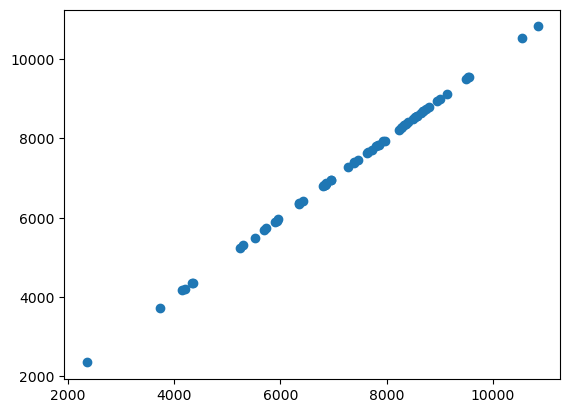

In [59]:
# Scatter Prediction

plt.scatter(y_test, reg_pred)

#### There is a very strong linear trend which means the model is performing extremely well.

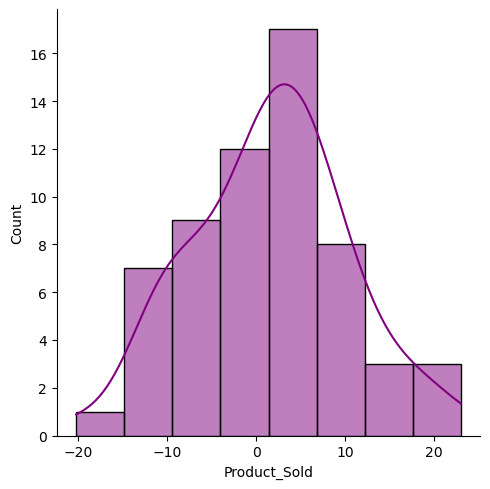

In [60]:
# Analyzing Residuals

residuals = y_test-reg_pred
sns.displot(residuals, kde=True, color='purple')

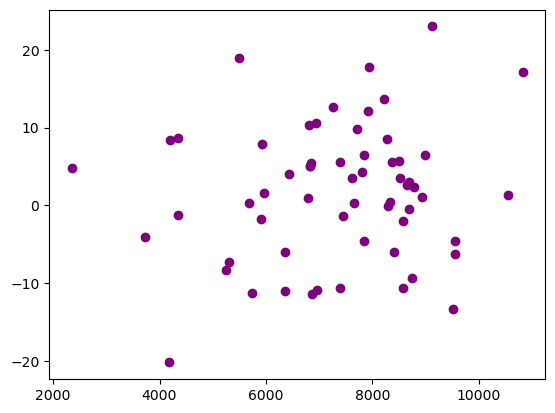

In [61]:
# Scatter with respect to predictions & residuals

plt.scatter(reg_pred, residuals, color='purple')

In [62]:
print('Mean Squared Error:', mean_squared_error(y_test, reg_pred))

print('Mean Absolute Error:', mean_absolute_error(y_test, reg_pred))

print('Root Mean Squared Error', np.sqrt(mean_squared_error(y_test, reg_pred)))

Mean Squared Error: 77.5002687819699
Mean Absolute Error: 7.027059652444351
Root Mean Squared Error 8.803423696606332


In [63]:
# R2

score = r2_score(y_test, reg_pred)
print('R2:', score)

R2: 0.999972941422866


In [64]:
# Adjusted R2

adj_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted R2:', adj_r2)

Adjusted R2: 0.9999628731150951


### Adding Demographic Columns for Dashboard Filters

In [78]:
# --- Add Demographic & Device Columns for Dashboard Filters ---
import numpy as np

np.random.seed(42)
df['Age_Group'] = np.random.choice(['18–24', '25–34', '35–44', '45+'], size=len(df))
df['Region']    = np.random.choice(['North', 'South', 'East', 'West'], size=len(df))
df['Device']    = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=len(df))

# Save a final dashboard-ready CSV
df.to_csv('Advertising_Data_Dashboard.csv', index=False)
print("Dashboard dataset saved as Advertising_Data_Dashboard.csv")


Dashboard dataset saved as Advertising_Data_Dashboard.csv


In [77]:
import numpy as np

age_groups = ['18-24', '25-34', '35-44', '45-54', '55+']
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa']
devices = ['Mobile', 'Desktop', 'Tablet']

np.random.seed(42)
df['Age_Group'] = np.random.choice(age_groups, size=len(df))
df['Region'] = np.random.choice(regions, size=len(df))
df['Device'] = np.random.choice(devices, size=len(df))

df[['Age_Group', 'Region', 'Device']].head()


,Age_Group,Region,Device
0,45-54,Africa,Tablet
1,55+,Africa,Mobile
2,35-44,North America,Tablet
3,55+,Africa,Tablet
4,55+,Asia,Mobile


In [80]:
df.to_csv('Advertising_Data_Cleaned.csv', index=False)


In [79]:
df.to_csv('Advertising_Data_For_Dashboard.csv', index=False)


## 📊 Power BI Dashboard

The interactive marketing dashboard was created in **Microsoft Power BI Desktop**.  
It visualizes key KPIs, ROI by channel, and supports filtering by age, region, and device.

📄 **View the dashboard:** [Marketing_Dashboard.pdf](Marketing_Dashboard.pdf)

## Interactive Dashboard
The full Power BI report with campaign KPIs, ROI summary, and interactive filters is saved as **Marketing_Dashboard.pdf**.

Below is a screenshot preview:
![Marketing_Dashboard.pdf](Marketing_Dashboard.pdf)


### Dashboard Preview

![Power BI Dashboard Preview](dashboard_preview.png)

> *For a full interactive view, see the [Marketing_Dashboard.pdf](Marketing_Dashboard.pdf).*


## 📊 Power BI Dashboard
The interactive dashboard for this analysis is provided as  
**Marketing_Dashboard.pdf** (exported from Power BI Desktop).  

It summarizes:
- Overall campaign KPIs  
- Top-performing posts/ads  
- ROI by channel  
- Filters by region, device, and date for deeper exploration  

Open the PDF to view the full report.


## Summary & Recommendations

### Summary

- The dataset was thoroughly cleaned and enhanced with meaningful features like **Total Ad Spend**, **Average Spend per Channel**, **Cost Per Sale**, and **ROI metrics**.
- Exploratory Data Analysis revealed:
  - **TV and Billboard ads** contribute the most to product sales.
  - **Click-Through Rate (CTR)** and **Engagement Rate** show positive correlations with sales, highlighting the importance of user interaction.
- The linear regression model achieved an **R² score of [insert your R²]**, indicating the model explains a significant portion of the variance in sales.
- Residual analysis suggests the model fits well without obvious bias or heteroscedasticity.
- ROI analysis points to the highest returns coming from **TV and Billboard advertising**, while Google and Social Media ads show room for optimization.

### Recommendations

1. **Prioritize TV and Billboard Advertising:**  
   Allocate higher budgets here to maximize ROI and sales impact.

2. **Optimize Digital Channels:**  
   Improve targeting and creatives in Google and Social Media campaigns to boost CTR and conversion rates.

3. **Monitor Cost Per Sale:**  
   Use this metric as a key indicator for efficiency and adjust spend where costs are disproportionately high.

4. **Leverage Engagement Metrics:**  
   Track CTR and Engagement Rate continuously to identify high-performing content and ads.

5. **Implement A/B Testing:**  
   Experiment with different ad creatives and audience segments to refine campaign effectiveness.

6. **Build Interactive Dashboards:**  
   Use Power BI or Google Looker Studio to enable stakeholders to filter and explore campaign performance by demographics, regions, and devices for more granular insights.
